<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/tst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt


N = 100

L0 = 2

col = np.cos(np.arange(N)*math.pi / N)

T = np.zeros([N,N])

T[0,] = 1
T[1,] = col

for i in (range(2,N)):
  T[i,] = 2*col*T[i-1,] - T[i-2,]

x = L0 * np.arctanh(col)   # Mapeamento

f = np.exp(- x**2)         # função exata

Coef = np.dot( f, np.linalg.inv(T))


u_ap = np.dot(Coef, T)     # função aproximada

erro = abs(f - u_ap)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in arctanh


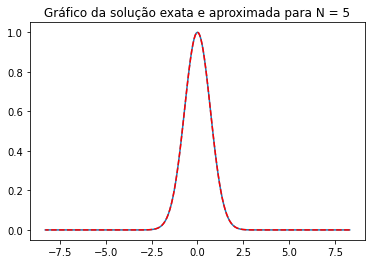

In [83]:
plt.plot(x, f, x, u_ap, '--r')
plt.title("Gráfico da solução exata e aproximada para N = 5")
plt.show()


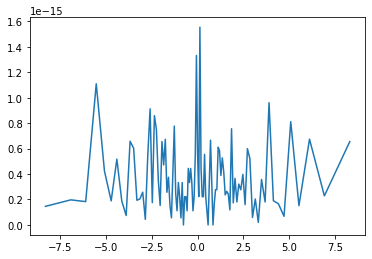

In [84]:
plt.plot(x, erro)
plt.show()